In [2]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [5]:
df = pd.read_csv("./data/cleaned_data_old.csv")
df.head()

Year  Month  Day Country       City  Latitude  Longitude  Population   Co  \
0  2014     12   29      AT       Graz     47.07      15.45  269,997.00 0.10   
1  2014     12   29      AT  Innsbruck     47.26      11.39  124,579.00 0.10   
2  2014     12   29      AT       Linz     48.31      14.29  193,814.00 0.10   
3  2014     12   29      AT   Salzburg     47.80      13.04  146,631.00 0.10   
4  2014     12   29      AT     Vienna     48.21      16.37         NaN 0.10   

    No2  ...  Wind-speed  Dew  Humidity  Tavg  Tmin  Tmax  Prcp  Wdir  Wspd  \
0  9.00  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1 25.60  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2 14.20  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3 21.10  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  9.00  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   Pres  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 27 columns]

In [7]:
# # Convert 'Date' column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

# # Split 'Date' column into 'year', 'month' and 'day'
# df['year'] = df['Date'].dt.year
# df['month'] = df['Date'].dt.month
# # df['day'] = df['Date'].dt.day

# # Remove 'Date' column
# if 'Date' in df.columns:
#     df.drop(columns=['Date'], inplace=True)


In [8]:
# Display the first 5 rows of the dataframe
df.head()

Year  Month  Day Country       City  Latitude  Longitude  Population   Co  \
0  2014     12   29      AT       Graz     47.07      15.45  269,997.00 0.10   
1  2014     12   29      AT  Innsbruck     47.26      11.39  124,579.00 0.10   
2  2014     12   29      AT       Linz     48.31      14.29  193,814.00 0.10   
3  2014     12   29      AT   Salzburg     47.80      13.04  146,631.00 0.10   
4  2014     12   29      AT     Vienna     48.21      16.37         NaN 0.10   

    No2  ...  Wind-speed  Dew  Humidity  Tavg  Tmin  Tmax  Prcp  Wdir  Wspd  \
0  9.00  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1 25.60  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2 14.20  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3 21.10  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  9.00  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   Pres  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 27 columns]

In [9]:
# Funktion für Übersicht über dtypes, missing values, unique values etc.
def overview(df):
    '''
    Erstelle einen Überblick über einige Eigenschaften der Spalten eines DataFrames.
    VARs
        df: Der zu betrachtende DataFrame
    RETURNS:
        None
    '''
    display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing': df.isna().sum(),
                          'missing%': df.isna().mean()*100,
                          'n_uniques': df.nunique(),
                          'uniques%': df.nunique()/df.shape[0]*100,
                          'uniques': [df[col].unique() for col in df.columns]
                         }))


In [10]:
overview(df)

dtype    total  missing  missing%  n_uniques  uniques%  \
Year           int64  1693858        0      0.00         12      0.00   
Month          int64  1693858        0      0.00         12      0.00   
Day            int64  1693858        0      0.00         31      0.00   
Country       object  1693858        0      0.00         95      0.01   
City          object  1693858        0      0.00        616      0.04   
Latitude     float64  1691031     2827      0.17        617      0.04   
Longitude    float64  1691031     2827      0.17        616      0.04   
Population   float64   363474  1330384     78.54       1289      0.08   
Co           float64  1062508   631350     37.27       1009      0.06   
No2          float64  1407818   286040     16.89       1291      0.08   
O3           float64  1320027   373831     22.07       1512      0.09   
Pm10         float64  1352215   341643     20.17       1186      0.07   
Pm25         float64  1431246   262612     15.50       1045      0.06   
Pressure     float64  1301257   392601     23.18       5512      0.33   
So2          float64  1161278   532580     31.44       1177      0.07   
Temperature  float64  1307555   386303     22.81        993      0.06   
Wind-gust    float64   775460   918398     54.22        597      0.04   
Wind-speed   float64  1281682   412176     24.33        964      0.06   
Dew          float64   999166   694692     41.01        661      0.04   
Humidity     float64  1305801   388057     22.91       1131      0.07   
Tavg         float64  1403687   290171     17.13        788      0.05   
Tmin         float64  1378595   315263     18.61        774      0.05   
Tmax         float64  1376836   317022     18.72        821      0.05   
Prcp         float64  1041241   652617     38.53       1381      0.08   
Wdir         float64  1170876   522982     30.88        361      0.02   
Wspd         float64  1240293   453565     26.78        654      0.04   
Pres         float64  1204252   489606     28.90        914      0.05   

                                                       uniques  
Year         [2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...  
Month                  [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  
Day          [29, 30, 31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11...  
Country      [AT, AU, BE, BO, BR, CA, CH, CL, CN, CO, CY, C...  
City         [Graz, Innsbruck, Linz, Salzburg, Vienna, Bris...  
Latitude     [47.06667, 47.26266, 48.30639, 47.79941, 48.20...  
Longitude    [15.45, 11.39454, 14.28611, 13.04399, 16.37208...  
Population   [269997.0, 124579.0, 193814.0, 146631.0, nan, ...  
Co           [0.1, 1.9, 2.1, nan, 2.3, 2.0, 3.4, 5.5, 3.8, ...  
No2          [9.0, 25.6, 14.2, 21.1, 4.6, 0.7, nan, 6.5, 4....  
O3           [nan, 3.7, 4.3, 12.8, 15.2, 21.0, 17.6, 6.1, 2...  
Pm10         [13.0, 25.0, 21.0, 20.0, 11.0, 9.0, 16.0, 14.0...  
Pm25         [nan, 74.0, 65.0, 20.0, 19.0, 13.0, 9.0, 27.0,...  
Pressure     [nan, 1026.0, 1028.0, 1030.0, 1027.0, 1004.5, ...  
So2          [1.6, 2.1, 2.6, 1.1, nan, 4.3, 2.9, 5.8, 1.5, ...  
Temperature  [nan, 0.0, 7.9, 7.1, 2.9, 4.0, 3.8, 8.1, 10.1,...  
Wind-gust    [nan, 1.5, 8.8, 1.7, 6.5, 0.9, 15.4, 18.3, 3.4...  
Wind-speed   [nan, 0.9, 1.8, 3.1, 0.0, 6.0, 10.0, 9.0, 5.0,...  
Dew          [nan, 16.0, 14.0, 0.5, 2.5, 1.0, 11.0, 18.0, 2...  
Humidity     [nan, 0.0, 100.0, 99.0, 94.0, 84.0, 82.0, 66.0...  
Tavg         [nan, -4.0, 25.4, 2.8, 2.2, 1.3, 2.6, 20.9, -2...  
Tmin         [nan, -6.4, 15.1, 25.2, 23.7, 13.6, 12.8, 11.2...  
Tmax         [nan, 0.4, 37.0, 31.3, 26.9, 22.4, 24.6, 27.9,...  
Prcp         [nan, 0.0, 12.2, 129.4, 6.6, 0.5, 2.8, 3.9, 4....  
Wdir         [nan, 18.0, 209.0, 210.0, 205.0, 188.0, 316.0,...  
Wspd         [nan, 3.5, 11.5, 17.4, 17.7, 19.5, 18.6, 19.1,...  
Pres         [nan, 1033.4, 1034.2, 1035.3, 1034.0, 1016.0, ...

In [11]:
missing_values = df.isna().mean() * 100  # Prozent der fehlenden Werte berechnen
missing_values_sorted = missing_values.sort_values(ascending=False)  # Nach aufsteigender Reihenfolge sortieren

print(missing_values_sorted)


Population    78.54
Wind-gust     54.22
Dew           41.01
Prcp          38.53
Co            37.27
So2           31.44
Wdir          30.88
Pres          28.90
Wspd          26.78
Wind-speed    24.33
Pressure      23.18
Humidity      22.91
Temperature   22.81
O3            22.07
Pm10          20.17
Tmax          18.72
Tmin          18.61
Tavg          17.13
No2           16.89
Pm25          15.50
Longitude      0.17
Latitude       0.17
Month          0.00
City           0.00
Country        0.00
Day            0.00
Year           0.00
dtype: float64


In [12]:
# Berechnen, wie viele Prozent der Werte pro Spalte fehlen
missing_percent = df.isna().mean() * 100  

# Spalten auswählen, die weniger als 50% fehlende Werte haben
df_cleaned = df.loc[:, missing_percent <= 53]

# Ergebnis ausgeben
print(f"Anzahl der entfernten Spalten: {df.shape[1] - df_cleaned.shape[1]}")
print("Übrige Spalten:", df_cleaned.columns)

df_cleaned.head()

Anzahl der entfernten Spalten: 2
Übrige Spalten: Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'Pressure', 'So2', 'Temperature',
       'Wind-speed', 'Dew', 'Humidity', 'Tavg', 'Tmin', 'Tmax', 'Prcp', 'Wdir',
       'Wspd', 'Pres'],
      dtype='object')


Year  Month  Day Country       City  Latitude  Longitude   Co   No2  O3  \
0  2014     12   29      AT       Graz     47.07      15.45 0.10  9.00 NaN   
1  2014     12   29      AT  Innsbruck     47.26      11.39 0.10 25.60 NaN   
2  2014     12   29      AT       Linz     48.31      14.29 0.10 14.20 NaN   
3  2014     12   29      AT   Salzburg     47.80      13.04 0.10 21.10 NaN   
4  2014     12   29      AT     Vienna     48.21      16.37 0.10  9.00 NaN   

   ...  Wind-speed  Dew  Humidity  Tavg  Tmin  Tmax  Prcp  Wdir  Wspd  Pres  
0  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...         NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 25 columns]

In [13]:
df_cleaned.shape

(1693858, 25)

In [14]:
missing_values_df_cleaned = df_cleaned.isna().mean() * 100  # Prozent der fehlenden Werte berechnen
missing_values_df_cleaned_sorted = missing_values_df_cleaned.sort_values(ascending=False)  # Nach aufsteigender Reihenfolge sortieren

print(missing_values_df_cleaned_sorted)

Dew           41.01
Prcp          38.53
Co            37.27
So2           31.44
Wdir          30.88
Pres          28.90
Wspd          26.78
Wind-speed    24.33
Pressure      23.18
Humidity      22.91
Temperature   22.81
O3            22.07
Pm10          20.17
Tmax          18.72
Tmin          18.61
Tavg          17.13
No2           16.89
Pm25          15.50
Longitude      0.17
Latitude       0.17
Month          0.00
City           0.00
Country        0.00
Day            0.00
Year           0.00
dtype: float64


In [15]:
df = df_cleaned
df.describe()

Year        Month          Day     Latitude    Longitude  \
count 1,693,858.00 1,693,858.00 1,693,858.00 1,691,031.00 1,691,031.00   
mean      2,020.30         5.83        15.73        31.82        26.65   
std           2.64         3.37         8.85        23.60        77.93   
min       2,014.00         1.00         1.00       -45.87      -157.86   
25%       2,019.00         3.00         8.00        26.84        -3.70   
50%       2,020.00         5.00        16.00        38.04        20.15   
75%       2,022.00         9.00        23.00        46.81       102.24   
max       2,025.00        12.00        31.00        65.01       175.28   

                Co          No2           O3         Pm10         Pm25  ...  \
count 1,062,508.00 1,407,818.00 1,320,027.00 1,352,215.00 1,431,246.00  ...   
mean          4.77         9.75        20.46        27.07        53.24  ...   
std           8.90        10.50        15.39        27.69        41.05  ...   
min           0.00         0.00         0.00         0.00         0.00  ...   
25%           1.40         4.60        11.80        12.00        25.00  ...   
50%           3.40         7.50        19.90        19.00        42.00  ...   
75%           5.60        12.40        27.20        34.00        67.00  ...   
max         500.00       500.00       500.00       999.00       999.00  ...   

        Wind-speed        Dew     Humidity         Tavg         Tmin  \
count 1,281,682.00 999,166.00 1,305,801.00 1,403,687.00 1,378,595.00   
mean          2.83       9.70        68.65        15.38        10.82   
std           6.69       9.59        23.91         9.53         9.38   
min           0.00     -64.30    -2,671.10       -41.00       -46.00   
25%           1.50       3.00        58.30         8.70         4.30   
50%           2.20      10.00        72.80        15.90        11.00   
75%           3.40      16.60        83.00        22.70        17.70   
max         999.90      32.00       999.90        44.80        39.00   

              Tmax         Prcp         Wdir         Wspd         Pres  
count 1,376,836.00 1,041,241.00 1,170,876.00 1,240,293.00 1,204,252.00  
mean         20.39         2.98       183.55        11.34     1,015.15  
std          10.20         9.00       106.94         6.24         8.12  
min         -37.20         0.00         0.00         0.00       925.20  
25%          13.10         0.00        86.00         7.00     1,010.00  
50%          21.10         0.00       194.00        10.00     1,015.00  
75%          28.30         1.70       275.00        14.20     1,020.30  
max          87.00       462.00       360.00       176.30     1,392.10  

[8 rows x 23 columns]

In [16]:
df.sample(20)

Year  Month  Day Country          City  Latitude  Longitude   Co  \
693195   2020      4   28      RU        Moscow     55.75      37.62 1.90   
1256150  2022     10   26      ES        Huelva     37.27      -6.94 0.10   
51249    2015      4   20      CN      Yinchuan     38.47     106.27 9.00   
309230   2018      2   10      MY       Malacca      2.20     102.24  NaN   
972307   2021      6    8      GB        London     42.98     -81.23 1.10   
1612280  2024     10   12      DE     Wiesbaden     50.08       8.25 0.10   
180571   2016      6   20      CN        Foshan     23.03     113.13 5.30   
721197   2020      6    9      CA        London     42.98     -81.23  NaN   
342205   2018      4   11      KR         Busan     35.10     129.03 3.40   
1364890  2023      4   30      TW  Taitung city     22.76     121.14 2.60   
1303977  2023      1   14      US       Memphis     35.15     -90.05  NaN   
569059   2019     10   24      DE      Augsburg     48.37      10.90 0.10   
1376432  2023      5   20      NL    Maastricht     50.85       5.69  NaN   
843956   2020     12    8      NL     Rotterdam     51.92       4.48  NaN   
1669665  2025      1   20      AU     Melbourne    -37.81     144.96 2.00   
640189   2020      2   10      GB        London     51.51      -0.13 3.00   
587971   2019     11   22      ZA  Johannesburg    -26.20      28.04 6.30   
1420930  2023      9   14      ES      Valencia     39.47      -0.38  NaN   
391798   2019      1    7      AU    Launceston    -41.44     147.13  NaN   
79545    2015      6   17      CA      Hamilton     43.25     -79.85 0.30   

          No2    O3  ...  Wind-speed   Dew  Humidity  Tavg  Tmin  Tmax  Prcp  \
693195   7.00 25.50  ...        4.20 -4.00     35.50  6.30  2.80  9.80   NaN   
1256150  6.40 20.70  ...        7.00   NaN     54.50 22.90 18.60 29.30  0.00   
51249   11.50 43.10  ...         NaN   NaN       NaN 11.30   NaN   NaN  0.00   
309230    NaN   NaN  ...         NaN   NaN       NaN 26.70 22.90 31.00  0.00   
972307  10.70 14.80  ...        1.80 11.00     62.70 17.10 11.60 22.70   NaN   
1612280  8.50  1.40  ...        2.30  6.00     87.00  8.60  5.00 13.00  2.00   
180571   7.40 10.60  ...         NaN   NaN       NaN 31.20 25.20 35.00   NaN   
721197   2.90 39.20  ...        1.50 13.00     41.50 12.00  8.10 15.90   NaN   
342205  12.10 33.60  ...         NaN   NaN       NaN 17.90   NaN 22.20  0.30   
1364890  2.50 34.00  ...        1.90 22.00     80.00   NaN   NaN   NaN   NaN   
1303977   NaN 18.40  ...        0.70   NaN     72.20  2.30 -2.20  7.80  0.00   
569059  12.80  1.70  ...        1.00 11.00     87.00 11.40  9.10 14.90  0.00   
1376432  4.20 30.10  ...        1.50   NaN     67.00 14.60  8.30 19.90  0.00   
843956  19.40  0.90  ...        1.70  1.50     93.00  2.30 -0.40  5.00  0.00   
1669665  7.50 28.10  ...        2.00 13.20     50.90   NaN   NaN   NaN   NaN   
640189   9.40 22.50  ...         NaN   NaN       NaN  0.20 -1.50  1.90   NaN   
587971  11.50 14.30  ...        2.20   NaN     64.00   NaN   NaN   NaN   NaN   
1420930  3.70 23.60  ...        3.00 20.00     76.60 22.90 20.60 28.20  7.20   
391798    NaN   NaN  ...        3.90  8.00     58.30 18.90 12.70 27.00  0.00   
79545    9.30 16.80  ...         NaN   NaN       NaN   NaN   NaN   NaN   NaN   

          Wdir  Wspd     Pres  
693195  297.00  4.90 1,008.50  
1256150  92.00 10.00 1,017.40  
51249      NaN   NaN      NaN  
309230   43.00 13.90 1,011.80  
972307  248.00  9.00 1,023.40  
1612280  96.00 11.20 1,014.60  
180571  149.00 10.50 1,007.70  
721197   70.00  6.20 1,020.40  
342205     NaN   NaN      NaN  
1364890    NaN   NaN      NaN  
1303977 358.00  5.80 1,026.30  
569059  207.00  5.40 1,012.10  
1376432  45.00 19.50 1,020.70  
843956   99.00  6.20 1,003.80  
1669665    NaN   NaN      NaN  
640189  302.00 10.60 1,017.40  
587971     NaN   NaN      NaN  
1420930  42.00 13.50 1,018.00  
391798  343.00  9.10 1,016.60  
79545      NaN   NaN      NaN  

[20 rows x 25 columns]

In [17]:
df.shape

(1693858, 25)

/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_28719/2509694658.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_city = df.groupby('City').apply(lambda x: x.isnull().sum())


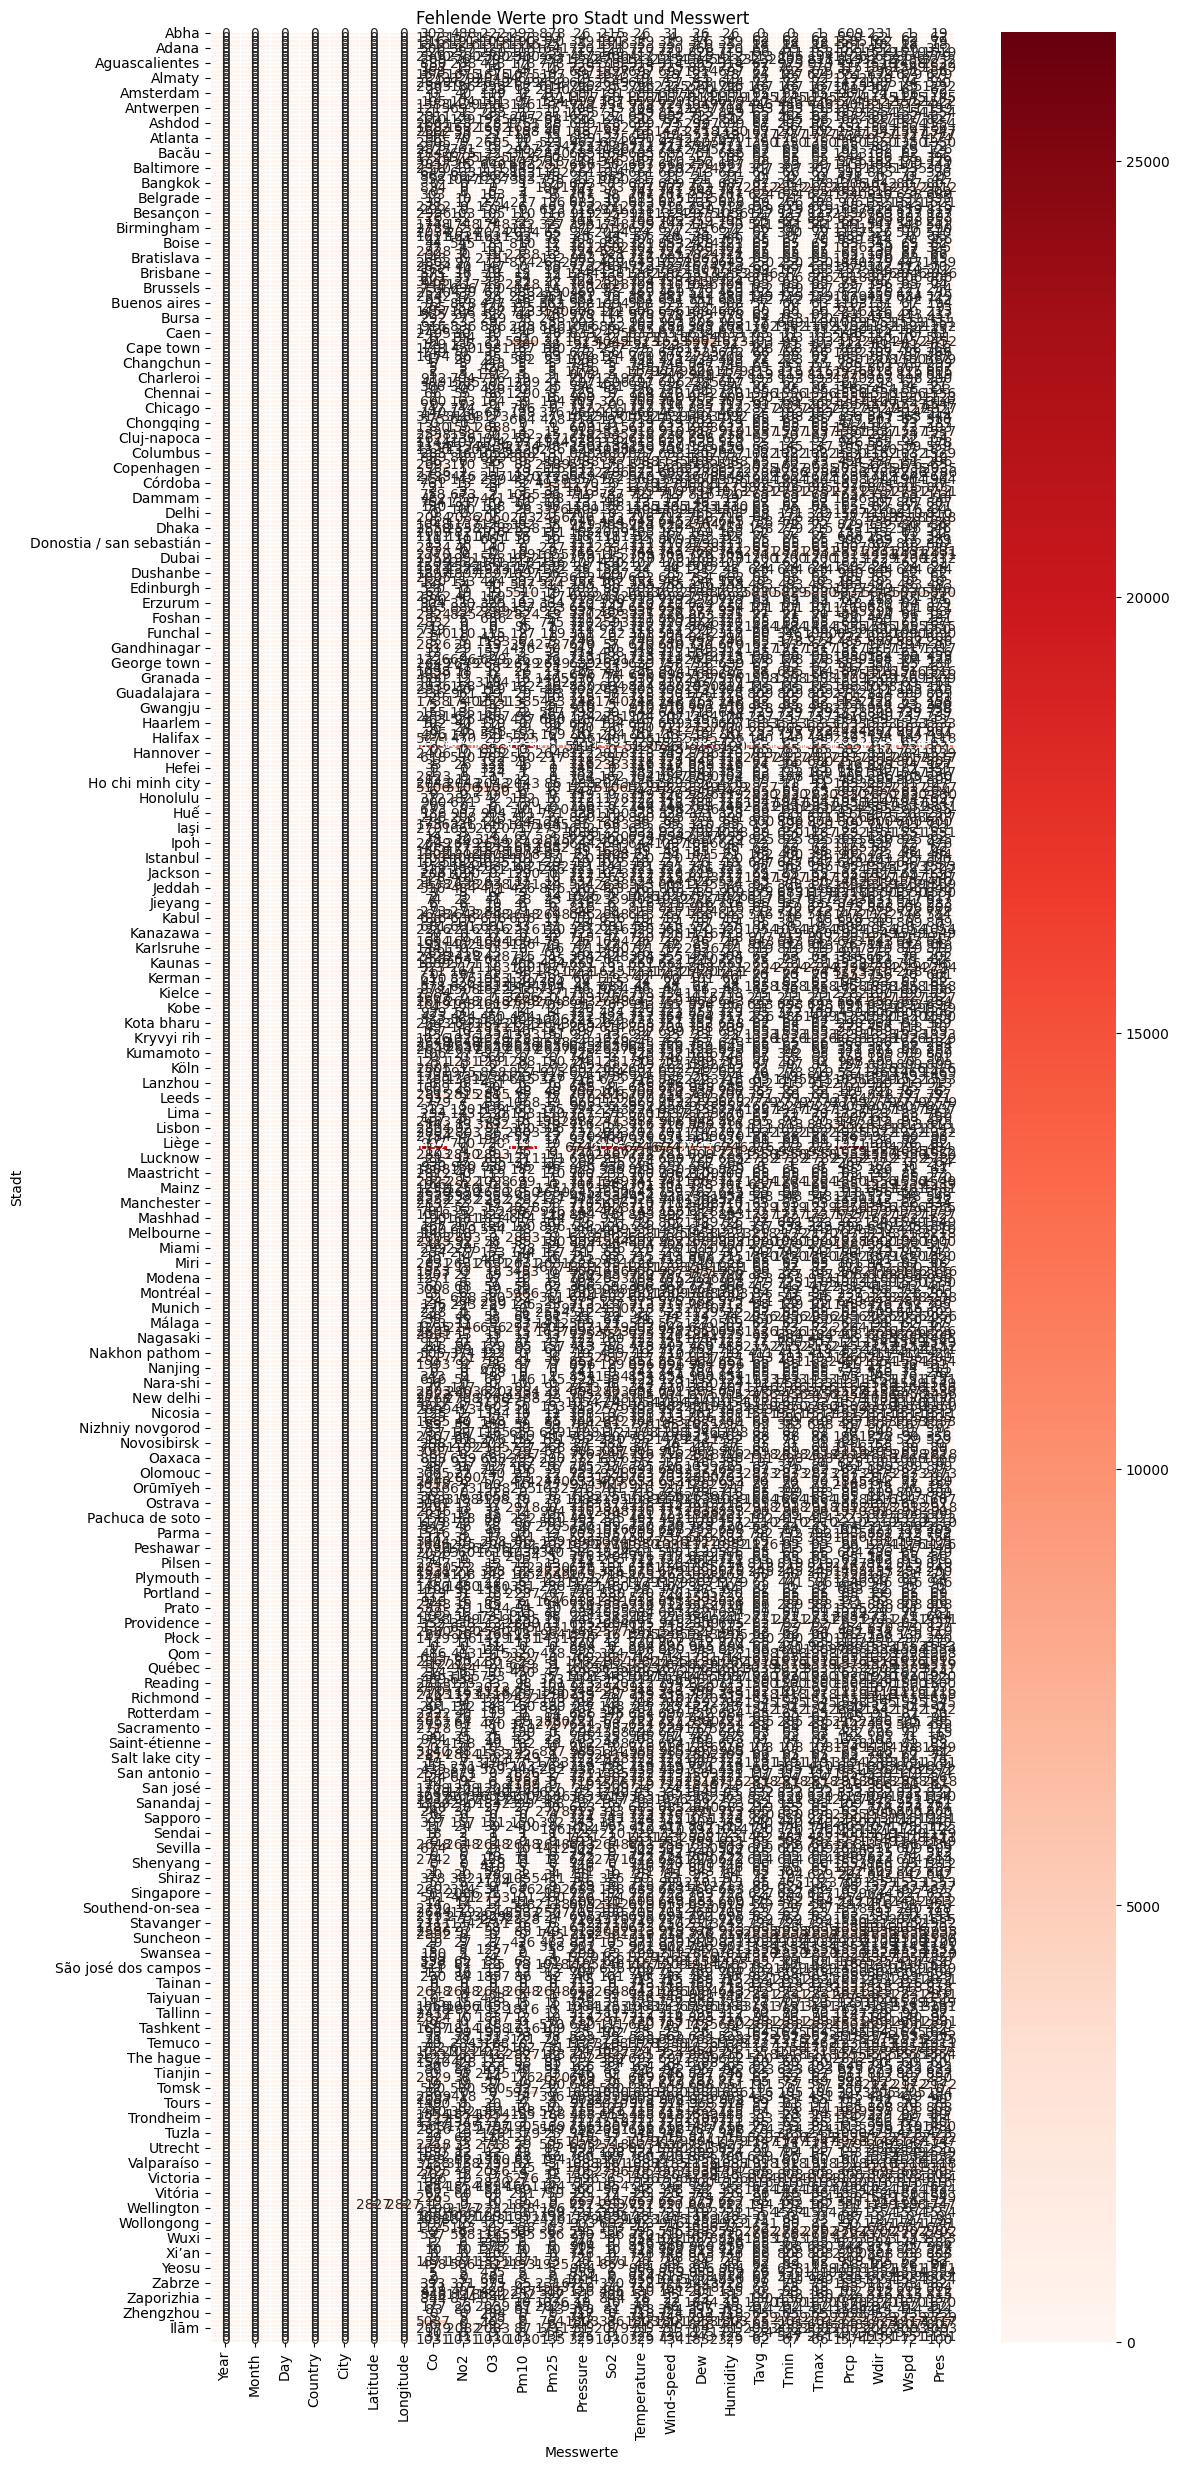

In [18]:
# Missing values by city, mit Heatmap

missing_by_city = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_by_city_percent = missing_by_city / len(df) * 100  # Prozentsatz der fehlenden Werte

missing_by_city_percent

plt.figure(figsize=(12, 30))
sns.heatmap(missing_by_city, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Fehlende Werte pro Stadt und Messwert")
plt.xlabel("Messwerte")
plt.ylabel("Stadt")
plt.xticks(rotation=90)
plt.show()


Idee: Vielleicht erst schauen, in welchen Städten es die meisten fehlenden Werte gibt und dann entscheiden, ob die Städte überhaupt mit in die Analyse einbezogen werden sollen. Vielleicht können wir viel mehr Zeilen erhalten, wenn wir einzelen Städte rauswerfen, die sehr wenig messen? Dann hätten wir weniger Städte, aber mehr Trainingsdaten für die Stäadte, die wir untersuchen wollen? Eigentlich mussten wir das ja schon gemacht haben, als wir nur die Städte mit den meisten Messwerte genommen haben. Aber vielleicht ist die Stadt mit den meisten Messwerten in einem bestimmten Land trotzdem eine Stadt mit wenigen Messwerten im Vergleich zu anderen Ländern?

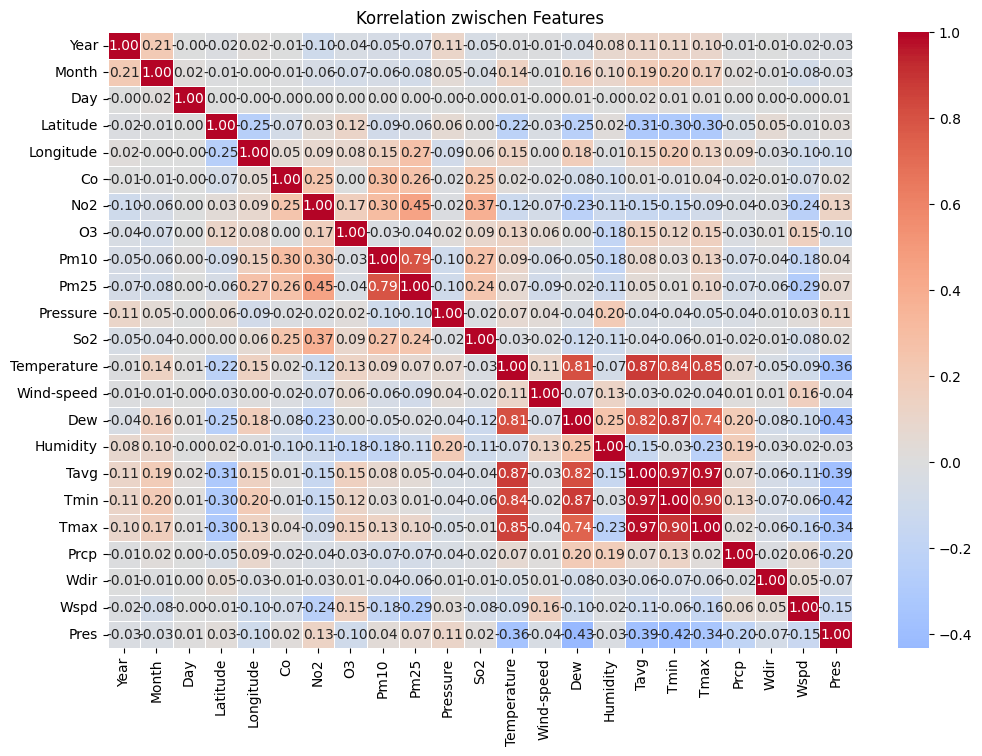

In [19]:
# Gibt es Korrelationen zwischen den Features (Collinearity)

# Heatmap: Wert über 0.8 = starke Korrelation
# Wert zwischen 0.5 und 0.8 = moderate Korrelation
# Wert unter 0.5 = schwache Korrelation

# Korrelationsmatrix berechnen
corr_matrix = df.select_dtypes(include=['number']).corr()

# Heatmap der Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Korrelation zwischen Features");


In [20]:
# Nur starke und moderate Korrelationen (>|0.5|) extrahieren, aber ohne die Hauptdiagonale (1.0)

# Korrelationsmatrix berechnen
corr_matrix = df.corr(numeric_only=True)

# Nur moderate und starke Korrelationen (>|0.5|) extrahieren, aber ohne die Hauptdiagonale (1.0)
strong_corrs = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix.abs() < 1.0)]

# DataFrame umwandeln, damit nur die relevanten Paare angezeigt werden
strong_corrs = strong_corrs.stack().reset_index()
strong_corrs.columns = ["Feature 1", "Feature 2", "Korrelation"]

# Doppelte Kombinationen entfernen (weil Korrelationen symmetrisch sind)
strong_corrs = strong_corrs.loc[strong_corrs["Feature 1"] < strong_corrs["Feature 2"]]

strong_corrs

Feature 1    Feature 2  Korrelation
0          Pm10         Pm25         0.79
4   Temperature         Tmin         0.84
5   Temperature         Tmax         0.85
6           Dew  Temperature         0.81
7           Dew         Tavg         0.82
8           Dew         Tmin         0.87
9           Dew         Tmax         0.74
10         Tavg  Temperature         0.87
12         Tavg         Tmin         0.97
13         Tavg         Tmax         0.97
21         Tmax         Tmin         0.90

In [23]:

# sns.scatterplot(data=df, x="Temperature", y="Dew", hue="City")
# plt.title("Zusammenhang zwischen Temperatur und Taupunkt")


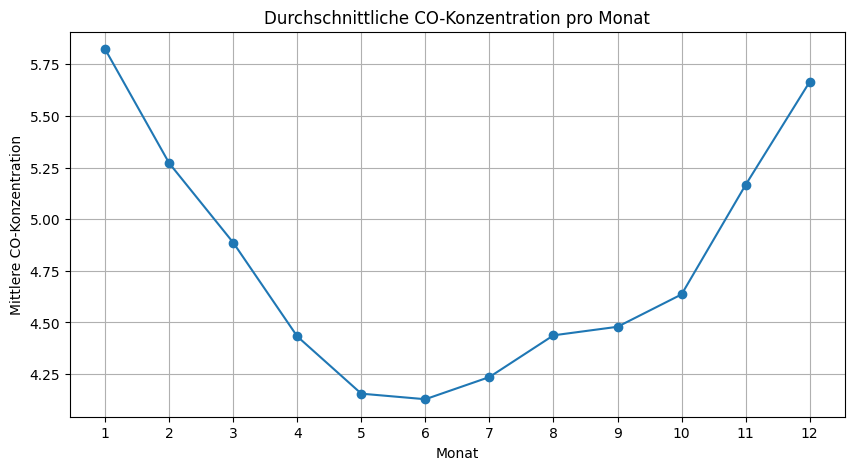

In [27]:
#Analyse CO-Werte pro Monat

# Konvertiere relevante Spalten in numerische Werte
numeric_columns = ["Co", "Dew", "Humidity", "No2", "O3", "Pm10", "Pm25",
                   "Pressure", "So2", "Temperature", "Wind-speed"]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Berechnung des mittleren CO-Werts pro Monat
monthly_co = df.groupby("Month")["Co"].mean()

# Plot erstellen
plt.figure(figsize=(10, 5))
plt.plot(monthly_co.index, monthly_co.values, marker='o', linestyle='-')
plt.xlabel("Monat")
plt.ylabel("Mittlere CO-Konzentration")
plt.title("Durchschnittliche CO-Konzentration pro Monat")
plt.xticks(range(1, 13))  # Monatsskala 1-12
plt.grid(True);


In [ ]:
# Trennung der Daten in Nord- und Südhalbkugel

# Definieren, welche Länder zur Nord- und Südhalbkugel gehören
northern_hemisphere_countries = {
    "US", "CA", "MX", "DE", "FR", "GB", "RU", "CN", "JP", "IN", "IT", "ES", "PL", "TR", "IR", "KR", "UA", "NL", "BE",
    "CH", "SE", "AT", "NO", "FI", "DK", "GR", "CZ", "HU", "RO", "BG", "PT", "IE", "SK", "HR", "LT", "SI", "LV", "EE"
}
southern_hemisphere_countries = {
    "AU", "NZ", "AR", "BR", "ZA", "CL", "ID", "PE", "BO", "EC", "PY", "UY", "MG"
}

# Daten für Nord- und Südhalbkugel filtern
df_north = df[df["Country"].isin(northern_hemisphere_countries)]
df_south = df[df["Country"].isin(southern_hemisphere_countries)]

# Mittlere CO-Konzentration pro Monat berechnen
monthly_co_north = df_north.groupby("month")["co"].mean()
monthly_co_south = df_south.groupby("month")["co"].mean()

# Plot erstellen
plt.figure(figsize=(10, 5))
plt.plot(monthly_co_north.index, monthly_co_north.values, marker='o', linestyle='-', label="Nordhalbkugel", color='b')
plt.plot(monthly_co_south.index, monthly_co_south.values, marker='o', linestyle='-', label="Südhalbkugel", color='r')

plt.xlabel("Monat")
plt.ylabel("Mittlere CO-Konzentration")
plt.title("Vergleich der CO-Konzentration auf Nord- und Südhalbkugel")
plt.xticks(range(1, 13))  # Monatsskala 1-12
plt.legend()
plt.grid(True);

In [ ]:
# Mittlere CO-Konzentration pro Land berechnen
country_co_avg = df.groupby("Country")["co"].mean().sort_values(ascending=False)

# Barplot erstellen
plt.figure(figsize=(12, 6))
country_co_avg.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel("Land")
plt.ylabel("Mittlere CO-Konzentration")
plt.title("Durchschnittliche CO-Konzentration pro Land")
plt.xticks(rotation=90)  # Länderbeschriftung drehen für bessere Lesbarkeit
plt.grid(axis='y', linestyle='--', alpha=0.7);


In [ ]:
# Mittlere CO-Konzentration pro Land berechnen

# Mindestanzahl an CO-Messwerten pro Land, um in die Analyse aufgenommen zu werden
min_measurements = 100  # Falls nötig, anpassen

# Anzahl der CO-Messwerte pro Land berechnen
country_co_counts = df.groupby("Country")["co"].count()

# Nur Länder behalten, die mindestens `min_measurements` Messwerte haben
valid_countries = country_co_counts[country_co_counts >= min_measurements].index

# Gefilterten DataFrame mit diesen Ländern erstellen
df_valid_countries = df[df["Country"].isin(valid_countries)]

# Mittlere CO-Konzentration für diese Länder berechnen
country_co_avg_filtered = df_valid_countries.groupby("Country")["co"].mean().sort_values(ascending=False)

# Falls nach der Filterung noch Daten vorhanden sind, Plot erstellen
if not country_co_avg_filtered.empty:
    plt.figure(figsize=(12, 6))
    country_co_avg_filtered.plot(kind='bar', color='b', alpha=0.7)
    plt.xlabel("Land")
    plt.ylabel("Mittlere CO-Konzentration")
    plt.title("Durchschnittliche CO-Konzentration pro Land (nur Länder mit ausreichenden Messwerten)")
    plt.xticks(rotation=90)  # Länderbeschriftung drehen für bessere Lesbarkeit
    plt.grid(axis='y', linestyle='--', alpha=0.7)
else:
    print("Keine ausreichenden Daten für CO-Werte in den Ländern verfügbar.")


In [ ]:
country_co_avg_filtered.head(20).plot(kind='bar')


In [ ]:
# Vergleich von Schadstoffen in verschiedenen Städten

# Liste der relevanten Schadstoff-Spalten (falls sie in den Daten vorhanden sind)
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]

# DataFrame mit nur den relevanten Spalten (fehlende Werte entfernen)
df_pollutants = df[pollutants].dropna()

# Korrelationsmatrix berechnen
corr_matrix = df_pollutants.corr()

# Heatmap der Korrelationen erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Korrelation zwischen CO und anderen Schadstoffen");


In [ ]:
df[["co", "no2"]].corr()

In [ ]:
# Korrelation Schadstoffe und Wettervariablen

# Liste der Schadstoffe und Wettervariablen
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]
weather_vars = ["temperature", "pressure", "humidity", "dew", "wind-speed", "wind-gust"]

# DataFrame mit nur den relevanten Spalten (fehlende Werte entfernen)
df_pollutants_weather = df[pollutants + weather_vars].dropna()

# Korrelationsmatrix berechnen
corr_matrix_weather = df_pollutants_weather.corr()

# Heatmap der Korrelationen zwischen Schadstoffen & Wettervariablen
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_weather, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Korrelation zwischen Schadstoffen und Wetterfaktoren");

In [ ]:
df[["co", "temperature"]].corr()

In [ ]:
# Schadstoffbelastung über die Zeit in verschiedenen Städten

# Durchschnittliche Schadstoffwerte pro Jahr berechnen
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]
yearly_trends = df.groupby("year")[pollutants].mean()

# Liniendiagramm für langfristige Trends erstellen
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(yearly_trends.index, yearly_trends[pollutant], marker='o', linestyle='-', label=pollutant)

plt.xlabel("Jahr")
plt.ylabel("Mittlere Konzentration")
plt.title("Langfristige Entwicklung der Schadstoffwerte")
plt.legend()
plt.grid(True);


In [ ]:
# Ohne 2014 und 2025, weil zu wenige Daten

# Schadstoffe, die analysiert werden sollen
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]

# Falls "year" als String gespeichert ist, in numerischen Wert umwandeln
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Durchschnittliche Schadstoffwerte pro Jahr berechnen, aber 2014 & 2025 ausschließen
yearly_trends = df.groupby("year")[pollutants].mean()
yearly_trends = yearly_trends.loc[(yearly_trends.index > 2014) & (yearly_trends.index < 2025)]

# Liniendiagramm für langfristige Trends erstellen
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(yearly_trends.index, yearly_trends[pollutant], marker='o', linestyle='-', label=pollutant)

plt.xlabel("Jahr")
plt.ylabel("Mittlere Konzentration")
plt.title("Langfristige Entwicklung der Schadstoffwerte (ohne 2014 & 2025)")
plt.legend()
plt.grid(True);


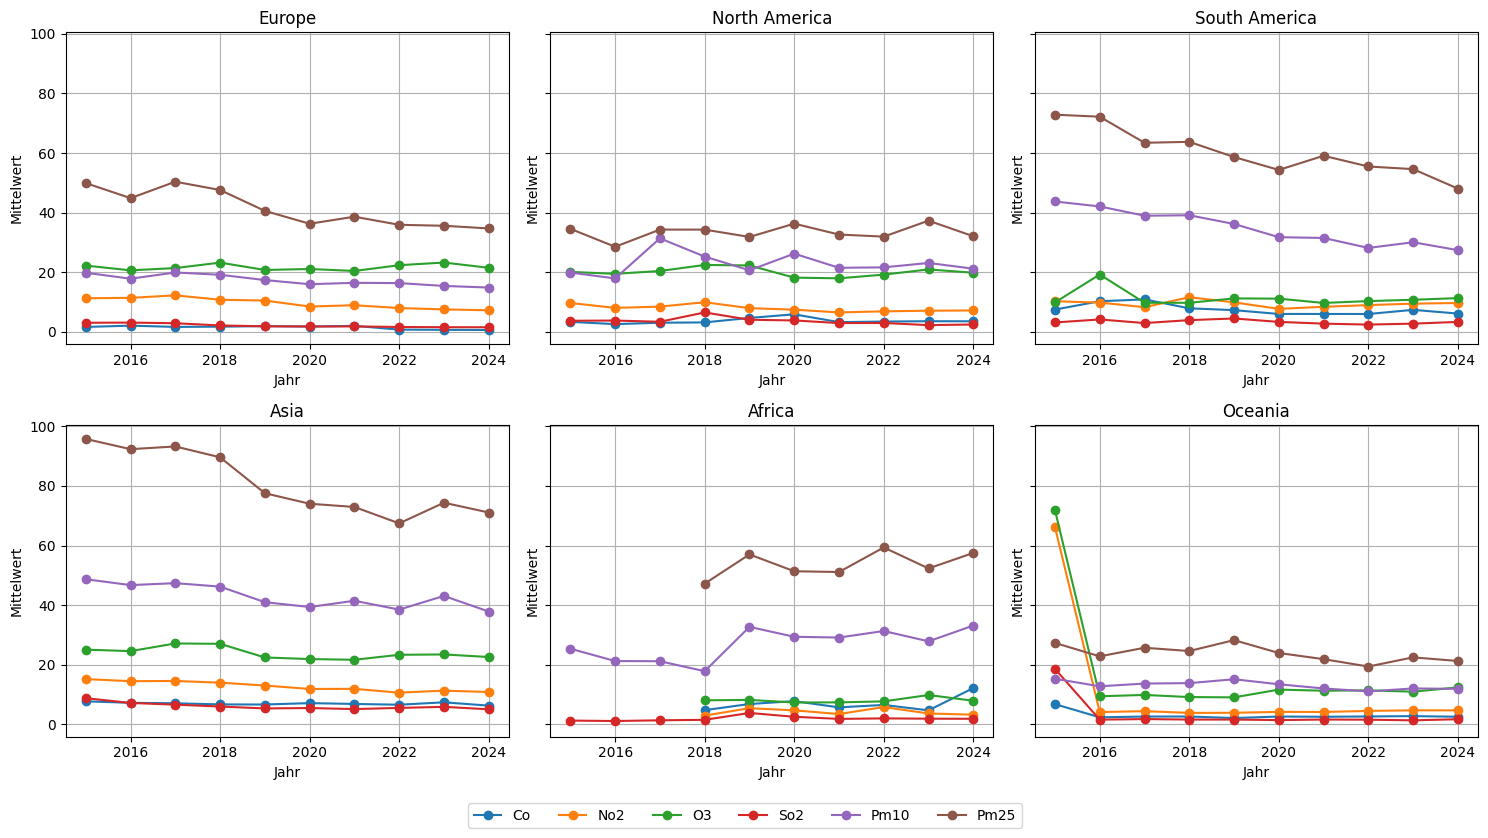

In [31]:
    import matplotlib.pyplot as plt

    # Schadstoffe, die analysiert werden sollen
    pollutants = ["Co", "No2", "O3", "So2", "Pm10", "Pm25"]

    # Länder nach Regionen gruppieren
    regions = {
        "Europe": {"DE", "FR", "GB", "IT", "ES", "PL", "NL", "SE", "AT", "CH", "BE"},
        "North America": {"US", "CA", "MX"},
        "South America": {"BR", "AR", "CO", "CL", "PE"},
        "Asia": {"CN", "IN", "JP", "KR", "IR"},
        "Africa": {"ZA", "EG", "NG"},
        "Oceania": {"AU", "NZ"}
    }

    # Falls "year" als String gespeichert ist, in numerischen Wert umwandeln
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

    # Regionen durchgehen & Diagramme erstellen
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)  # Einheitliche Achsen für bessere Vergleichbarkeit
    axes = axes.flatten()  # 2D-Array in 1D-Array umwandeln

    # Speichert alle Linien für die gemeinsame Legende
    handles, labels = [], []

    for i, (region, countries) in enumerate(regions.items()):
        df_region = df[df["Country"].isin(countries)]
        yearly_trends_region = df_region.groupby("Year")[pollutants].mean()
        yearly_trends_region = yearly_trends_region.loc[(yearly_trends_region.index > 2014) & (yearly_trends_region.index < 2025)]
        
        ax = axes[i]
        for pollutant in pollutants:
            line, = ax.plot(yearly_trends_region.index, yearly_trends_region[pollutant], marker='o', linestyle='-', label=pollutant)
            
            # Speichert eine Linie pro Schadstoff für die gemeinsame Legende
            if i == 0:  
                handles.append(line)
                labels.append(pollutant)

        ax.set_title(region)
        ax.set_xlabel("Jahr")
        ax.set_ylabel("Mittelwert")
        ax.grid(True)

    for ax in axes[:3]:  # Die ersten drei Subplots sind in der oberen Reihe
        ax.xaxis.set_tick_params(labelbottom=True)

    # Gemeinsame Legende unterhalb der Subplots platzieren
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(pollutants))

    # Layout optimieren
    plt.tight_layout();

In [32]:
# Sechs Top-Länder in Europa

import matplotlib.pyplot as plt

# Schadstoffe, die analysiert werden sollen
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]

# Europäische Länder definieren
european_countries = {"DE", "FR", "GB", "IT", "ES", "PL", "NL", "SE", "AT", "CH", "BE"}

# Falls "year" als String gespeichert ist, in numerischen Wert umwandeln
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Nur europäische Länder auswählen
df_europe = df[df["Country"].isin(european_countries)]

# Länder mit den meisten Messwerten identifizieren
top_countries = df_europe["Country"].value_counts().nlargest(6).index  # Falls nur 6 Länder visualisiert werden sollen

# Subplots für die gewählten Länder erstellen
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)  # 2 Reihen, 3 Spalten
axes = axes.flatten()

for i, country in enumerate(top_countries):
    df_country = df_europe[df_europe["Country"] == country]
    yearly_trends_country = df_country.groupby("year")[pollutants].mean()
    yearly_trends_country = yearly_trends_country.loc[(yearly_trends_country.index > 2014) & (yearly_trends_country.index < 2025)]
    
    ax = axes[i]
    for pollutant in pollutants:
        ax.plot(yearly_trends_country.index, yearly_trends_country[pollutant], marker='o', linestyle='-', label=pollutant)
    
    ax.set_title(country)
    ax.set_xlabel("Jahr")
    ax.set_ylabel("Mittelwert")
    ax.grid(True)

# Gemeinsame Legende unterhalb der Subplots platzieren
fig.legend(pollutants, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(pollutants))

# Layout optimieren
plt.tight_layout();

KeyError: 'year'

In [ ]:
# Korrekation zwischen Ozon und anderen Faktoren

# Relevante Spalten auswählen
pollutants = ["co", "no2", "so2", "pm10", "pm25", "o3"]
weather_vars = ["temperature", "pressure", "humidity", "dew", "wind-speed", "wind-gust"]

# DataFrame mit nur den relevanten Spalten (fehlende Werte entfernen)
df_ozone_corr = df[pollutants + weather_vars].dropna()

# Korrelationsmatrix berechnen
corr_matrix_ozone = df_ozone_corr.corr()

# Heatmap der Korrelationen zwischen Ozon und anderen Faktoren
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_ozone, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Korrelation zwischen Ozon (O₃) und anderen Faktoren");


In [ ]:
# Durchschnittliche Ozonwerte pro Monat berechnen
monthly_o3 = df.groupby("month")["o3"].mean()

# Liniendiagramm für die saisonale Entwicklung von Ozon erstellen
plt.figure(figsize=(10, 5))
plt.plot(monthly_o3.index, monthly_o3.values, marker='o', linestyle='-', color='b')
plt.xlabel("Monat")
plt.ylabel("Mittlere O₃-Konzentration")
plt.title("Saisonale Entwicklung der Ozonwerte (O₃)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.grid(True);

In [ ]:
# Länder nach Hemisphäre aufteilen
northern_hemisphere_countries = {
    "US", "CA", "MX", "DE", "FR", "GB", "IT", "ES", "PL", "NL", "SE", "AT", "CH", "BE", "RU", "CN", "JP", "IN", "KR"
}
southern_hemisphere_countries = {
    "AU", "NZ", "AR", "BR", "ZA", "CL", "ID", "PE", "BO", "EC", "PY", "UY", "MG"
}

# Daten für Nord- und Südhalbkugel filtern
df_north = df[df["Country"].isin(northern_hemisphere_countries)]
df_south = df[df["Country"].isin(southern_hemisphere_countries)]

# Durchschnittliche Ozonwerte pro Monat für beide Hemisphären berechnen
monthly_o3_north = df_north.groupby("month")["o3"].mean()
monthly_o3_south = df_south.groupby("month")["o3"].mean()

# Plot erstellen
plt.figure(figsize=(10, 5))
plt.plot(monthly_o3_north.index, monthly_o3_north.values, marker='o', linestyle='-', label="Nordhalbkugel", color='b')
plt.plot(monthly_o3_south.index, monthly_o3_south.values, marker='o', linestyle='-', label="Südhalbkugel", color='r')

plt.xlabel("Monat")
plt.ylabel("Mittlere O₃-Konzentration")
plt.title("Vergleich der Ozonwerte (O₃) zwischen Nord- und Südhalbkugel")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.legend()
plt.grid(True);



In [ ]:
import matplotlib.pyplot as plt

# Europäische Länder definieren
european_countries = {"DE", "FR", "GB", "IT", "ES", "PL", "NL", "SE", "AT", "CH", "BE"}

# Falls "year" als String gespeichert ist, in numerischen Wert umwandeln
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Nur europäische Länder auswählen
df_europe = df[df["Country"].isin(european_countries)]

# Jahre 2014 & 2025 aus der Analyse entfernen
df_europe = df_europe[(df_europe["year"] > 2014) & (df_europe["year"] < 2025)]

# Nur Länder behalten, die tatsächlich O₃-Werte haben
countries_with_o3 = df_europe.groupby("Country")["o3"].count()
valid_countries = countries_with_o3[countries_with_o3 > 0].index  # Länder mit vorhandenen O₃-Werten

# DataFrame auf diese Länder filtern
df_europe = df_europe[df_europe["Country"].isin(valid_countries)]

# Standardabweichung (Schwankungsstärke) von O₃ pro Jahr & Land berechnen
ozone_volatility = df_europe.groupby(["year", "Country"])["o3"].std().unstack()

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(12, 6))
handles = []  # Zum Speichern der Linien für die Legende
labels = []   # Zum Speichern der Ländernamen

for country in ozone_volatility.columns:
    line, = ax.plot(ozone_volatility.index, ozone_volatility[country], marker='o', linestyle='-', label=country)
    handles.append(line)
    labels.append(country)

ax.set_xlabel("Jahr")
ax.set_ylabel("Standardabweichung von O₃ (Schwankungsstärke)")
ax.set_title("Jährliche Schwankungsstärke der Ozonwerte in europäischen Ländern (nur Länder mit Daten)")
ax.grid(True)

# Legende unterhalb des Plots platzieren
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(valid_countries))

# Layout optimieren
plt.tight_layout();

In [ ]:
# Clusteranalyse zur Schadstoffbelastung

from sklearn.preprocessing import StandardScaler

# Liste der Schadstoff-Features für das Clustering
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]

# Durchschnittliche Schadstoffwerte pro Land berechnen
df_cluster = df.groupby("Country")[pollutants].mean().dropna()

# Daten skalieren (K-Means ist empfindlich gegenüber unterschiedlichen Skalen)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Ergebnis als DataFrame zurückgeben
df_cluster_scaled = pd.DataFrame(df_scaled, index=df_cluster.index, columns=pollutants)

# Überprüfen, ob die Daten korrekt vorbereitet sind
df_cluster_scaled.head()


In [ ]:
from sklearn.cluster import KMeans

# Teste verschiedene Clusterzahlen (k = 1 bis 10)
inertia = []
k_values = range(1, 31)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)  # Speichert den Fehler (Inertia)

# Elbow-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Inertia (Fehler)")
plt.title("Elbow-Methode zur Bestimmung der optimalen Clusterzahl")
plt.grid(True);


In [ ]:
from sklearn.metrics import silhouette_score

# Teste verschiedene Clusterzahlen (k = 2 bis 10, weil k=1 keine Silhouettenwertung hat)
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cluster_scaled)
    score = silhouette_score(df_cluster_scaled, labels)
    silhouette_scores.append(score)

# Silhouetten-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Silhouetten-Koeffizient")
plt.title("Silhouetten-Analyse zur Bestimmung der optimalen Clusterzahl")
plt.grid(True);


Entscheidung: 5 Cluster nehmen

In [ ]:
# K-Means Clustering mit k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster_scaled["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

# Cluster-Zugehörigkeit pro Land anzeigen
df_clusters = df_cluster_scaled[["Cluster"]]
df_clusters.head()


In [ ]:
df_clusters["Cluster"].value_counts()


In [ ]:
df_cluster_scaled.groupby("Cluster").mean()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cluster_scaled["Cluster"], y=df_cluster_scaled["pm25"])
plt.xlabel("Cluster")
plt.ylabel("PM2.5-Werte (standardisiert)")
plt.title("Vergleich der PM2.5-Werte in den Clustern")
plt.grid(True);

In [ ]:
# Länder und ihre Cluster-Zugehörigkeit anzeigen
df_clusters_sorted = df_clusters.sort_values(by="Cluster")  # Nach Cluster sortieren
df_clusters_sorted


In [ ]:
# Test mit 4 oder 6 Clustern

# K-Means mit 4 und 6 Clustern testen
for k in [4, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_cluster_scaled[f"Cluster_{k}"] = kmeans.fit_predict(df_cluster_scaled)

# Ergebnisse anzeigen
df_clusters_test = df_cluster_scaled[["Cluster_4", "Cluster_6"]]
df_clusters_test


In [ ]:
df_cluster_scaled.groupby("Cluster").mean()


In [ ]:
# K-Means nochmal ausführen, mit Stadt statt Land

from sklearn.preprocessing import StandardScaler

# Liste der Schadstoff-Features für das Clustering
pollutants = ["co", "no2", "o3", "so2", "pm10", "pm25"]

# Durchschnittliche Schadstoffwerte pro Stadt berechnen
df_cluster = df.groupby("City")[pollutants].mean().dropna()

# Daten skalieren (K-Means ist empfindlich gegenüber unterschiedlichen Skalen)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Ergebnis als DataFrame zurückgeben
df_cluster_scaled = pd.DataFrame(df_scaled, index=df_cluster.index, columns=pollutants)

# Überprüfen, ob die Daten korrekt vorbereitet sind
df_cluster_scaled.head()


In [ ]:

# Teheran rausschmeißen


from sklearn.cluster import KMeans

# Teste verschiedene Clusterzahlen (k = 1 bis 30) ohne Teheran
inertia_no_tehran = []
k_values = range(1, 31)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_no_tehran.drop(columns=["Cluster"]))  # Clustering ohne vorherige Cluster-Spalte
    inertia_no_tehran.append(kmeans.inertia_)

# Elbow-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_no_tehran, marker='o', linestyle='-')
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Inertia (Fehler)")
plt.title("Elbow-Methode ohne Teheran")
plt.grid(True);



In [ ]:
# K-Means Clustering mit 4 Clustern (oder einer anderen optimalen Zahl)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster_scaled["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

# Cluster-Zugehörigkeit pro Stadt anzeigen
df_clusters = df_cluster_scaled[["Cluster"]]
df_clusters_sorted = df_clusters.sort_values(by="Cluster")  # Sortiert nach Cluster
df_clusters_sorted


In [ ]:
# Teheran aus dem DataFrame entfernen
df_cluster_no_tehran = df_cluster_scaled.drop(index="Tehran")

# K-Means erneut ausführen mit 5 Clustern (oder einer anderen optimalen Zahl)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster_no_tehran["Cluster"] = kmeans.fit_predict(df_cluster_no_tehran)

# Neue Cluster-Zugehörigkeit der Städte anzeigen
df_clusters_no_tehran = df_cluster_no_tehran[["Cluster"]]
df_clusters_no_tehran_sorted = df_clusters_no_tehran.sort_values(by="Cluster")  # Sortiert nach Cluster
df_clusters_no_tehran_sorted
